In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

yt=y[build_k_indices(y,4,1)]

In [4]:
build_k_indices(y,4,1).shape

(4, 12)

In [5]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    yte=y[k_indices]
    xte=x[k_indices]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    phi=np.array([]).reshape(xte.shape[1]*3,0)
    phi2=np.array([]).reshape(xte.shape[1],0)
    for i in range(k):
        xte_temp=np.concatenate((xte[i%k,:],xte[(i+1)%k,:],xte[(i+2)%k,:]),axis=0)
        xte_temp2=xte[(i+3)%4]
        phi_temp=build_poly(xte_temp,degree)
        phi_temp2=build_poly(xte_temp2,degree)
        phi2=np.c_[phi2,phi_temp2]
        phi=np.c_[phi,phi_temp]
        
        
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************    
    weigths=np.array([]).reshape(degree+1,0)
    for i in range(k):
        yte_temp=np.concatenate((yte[i%k,:],yte[(i+1)%k,:],yte[(i+2)%k,:]),axis=0)
        weigth=ridge_regression(yte_temp,phi[:,i*(degree+1):(i*(degree+1)+degree+1)],lambda_)
        weigth=weigth.reshape(degree+1,1)
        weigths=np.c_[weigths, weigth]
        
    # ***************************************************
    # INSERT YOUR CODE vERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr=[]
    loss_te=[]
    for i in range(k):
            ytr_temp=np.concatenate((yte[i%k,:],yte[(i+1)%k,:],yte[(i+2)%k,:]),axis=0)
            yte_temp=yte[(i+3)%k]
            temp_tr=(2*compute_mse(ytr_temp,phi[:,i*(degree+1):(i*(degree+1)+degree+1)],weigths[:,i]))**0.5
            temp_te=(2*compute_mse(yte_temp,phi2[:,i*(degree+1):(i*(degree+1)+degree+1)],weigths[:,i]))**0.5
            loss_tr=np.append(loss_tr,temp_tr)
            loss_te=np.append(loss_te,temp_te)
   
    
    return np.mean(loss_tr), np.mean(loss_te)

In [6]:
cross_validation(y, x, build_k_indices(y, 4, 1), 4, 0.5, 2)

(0.46137188918647576, 0.5352149002362503)

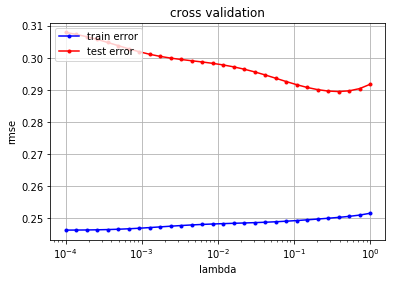

In [7]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for l in lambdas:
        tr_temp, te_temp = cross_validation(y, x, k_indices,k_fold, l, degree)
        rmse_tr.append(tr_temp)
        rmse_te.append(te_temp)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()